In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette

def pie_plot(sunny_data, rainy_data):
#     custom_colors = ["#66AAD4","#dce9be" ,"#bcebdf"]
    custom_colors = ["#66AAD4","#bcebdf","#f7edc6"]
#     custom_colors = ["#66AAD4","#bcebdf","#e8c8d1"]
    label_size = 20
    # Count the occurrences of each mode in 'target_mode' and 'predict_mode'
    sunny_mode_counts = sunny_data['target_mode'].value_counts().reindex(['Car', 'Public_transport', 'Walking'])
    rainy_mode_counts = rainy_data['predict_mode'].value_counts().reindex(['Car', 'Public_transport', 'Walking'])
    explode = (0, 0, 0.1)  # only "explode" the 3rd slice (i.e. 'Walking')
#     wedgeprops = {'edgecolor': 'black', 'linewidth': 0.5}
    wedgeprops = {'edgecolor': 'white', 'linewidth': 2}
    textprops = {'fontsize': 15}
    # Create a pie chart for 'target_mode'
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.pie(sunny_mode_counts, labels=sunny_mode_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, 
            colors=custom_colors,textprops=textprops,wedgeprops=wedgeprops)
    plt.title('Sunny',fontweight='bold',fontsize=label_size,pad=20)

    # Create a pie chart for 'predict_mode'
    plt.subplot(1, 2, 2)
    plt.pie(rainy_mode_counts, labels=rainy_mode_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, 
            colors=custom_colors,textprops=textprops,wedgeprops=wedgeprops)
    plt.title('Rainy',fontweight='bold',fontsize=label_size,pad=20)

    plt.tight_layout()
    plt.savefig('results/changing_conditions.png')
    plt.show()

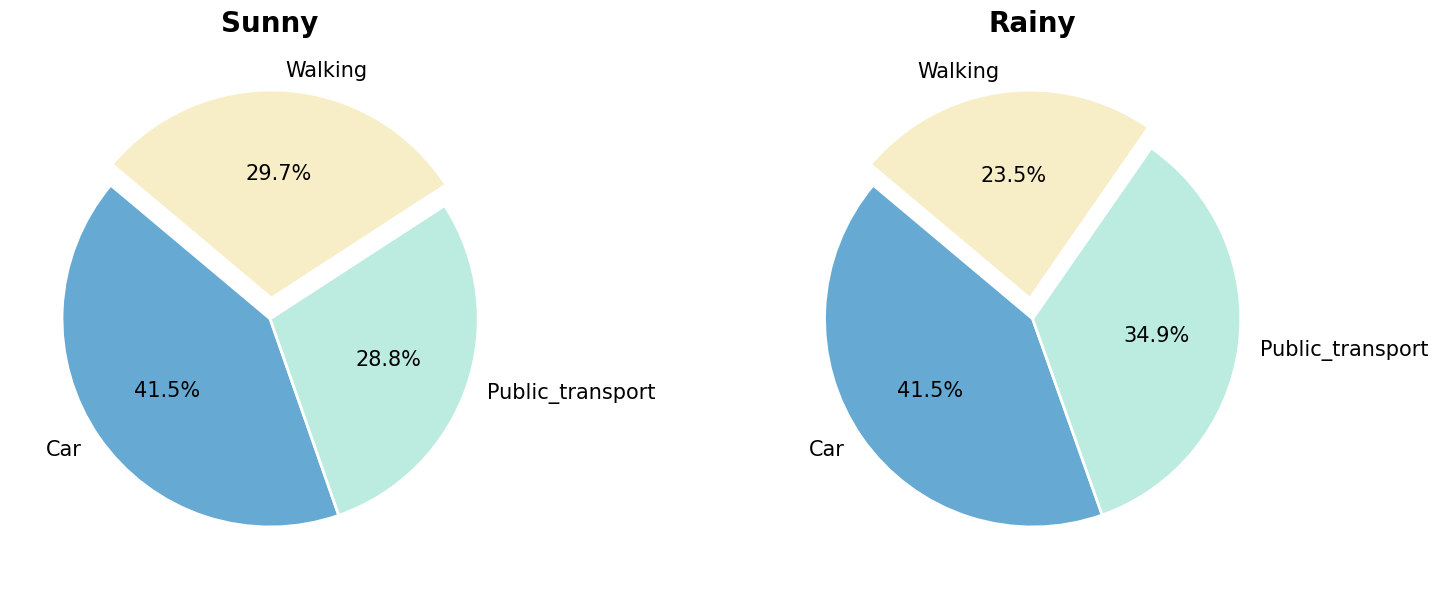

In [97]:
from model import ChoiceModel


desire='Eat'
num_sample = 1000

choice_model = ChoiceModel(
    data_dir='data', desire=desire, sample_num=num_sample , skip_init=True)

rainy_data = choice_model._read_log_data(log_path=f'data/logs/{num_sample}/Rainy.csv',test_path=f'data/test/{desire}.csv')
sunny_data = choice_model._read_log_data(log_path=f'data/logs/{num_sample}/Sunny.csv',test_path=f'data/test/{desire}.csv')

pie_plot(sunny_data=sunny_data, rainy_data=rainy_data)